In [1]:
import pandas as pd

# Load the dataset
file_path = 'day.csv'  # Change path if your file is in another folder
data = pd.read_csv(file_path)

# Show first 5 rows
print(data.head())

# Summary information about columns, data types, and missing values
print(data.info())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [2]:
# Mapping values according to data dictionary
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_dict = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

# Apply mappings
data['season'] = data['season'].map(season_dict)
data['weathersit'] = data['weathersit'].map(weathersit_dict)

# View unique values to confirm conversion
print(data[['season', 'weathersit']].drop_duplicates())

     season       weathersit
0    Spring             Mist
2    Spring            Clear
25   Spring  Light Snow/Rain
79   Summer             Mist
80   Summer            Clear
89   Summer  Light Snow/Rain
171    Fall             Mist
172    Fall            Clear
248    Fall  Light Snow/Rain
265  Winter             Mist
271  Winter            Clear
284  Winter  Light Snow/Rain


In [3]:
# Convert categorical variables 'season', 'weathersit' to dummy variables
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)

# Drop columns that won't be used for prediction
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Display first 5 rows after encoding and dropping columns
print(data.head())

   yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  season_Spring  season_Summer  season_Winter  \
0  10.749882   985           True          False          False   
1  16.652113   801           True          False          False   
2  16.636703  1349           True          False          False   
3  10.739832  1562           True          False          False   
4  12.522300  1600           True          False          False   

   weathersit_Light Snow/Rain  weathersit_Mist  
0                       False             True  
1                       False             True  

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

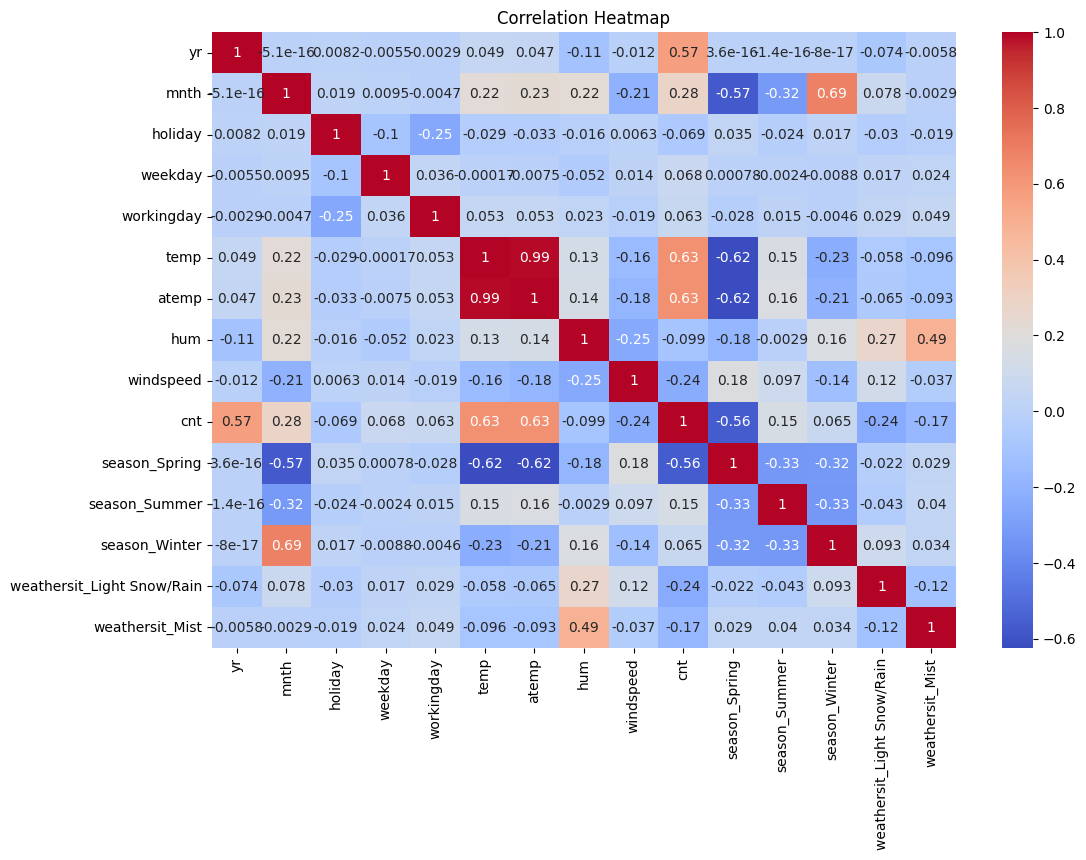

In [5]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

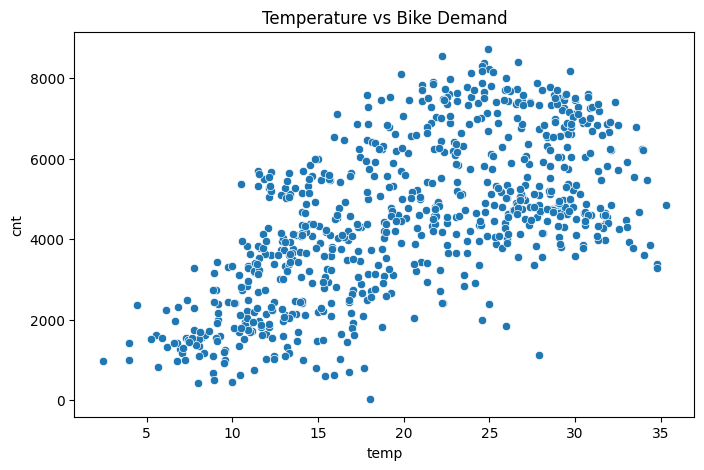

In [6]:
# Scatter plot of temp vs demand (cnt)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Temperature vs Bike Demand')
plt.show()


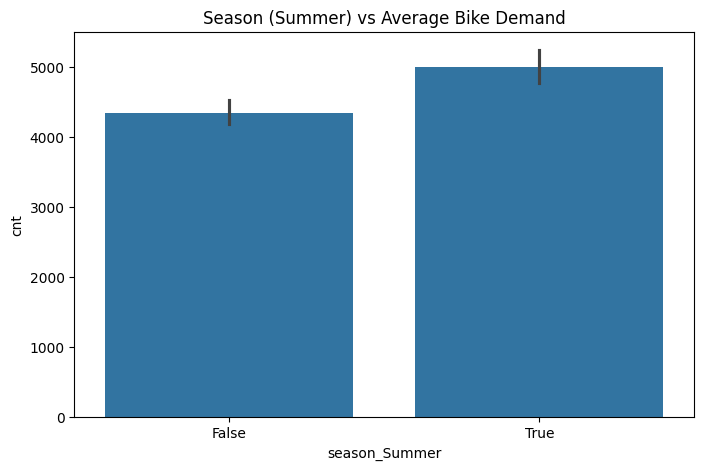

In [7]:
# Count plot for categorical variable 'season_Summer' vs demand average
plt.figure(figsize=(8, 5))
sns.barplot(x='season_Summer', y='cnt', data=data)
plt.title('Season (Summer) vs Average Bike Demand')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Separate features (X) and target variable (y)
X = data.drop('cnt', axis=1)
y = data['cnt']


In [10]:
# Perform train-test split, 70% train, 30% test, with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Check the shapes to verify split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (511, 14)
Test set shape: (219, 14)


In [12]:
import numpy as np

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Initialize the Linear Regression model
model = LinearRegression()

In [15]:
# Fit the model on training data
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# Predict demand on test data
y_pred = model.predict(X_test)

In [17]:
# Calculate RMSE and R-squared for evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [18]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Root Mean Squared Error (RMSE): 796.24
R-squared (R²): 0.8291


In [19]:
# Create a dataframe of feature coefficients
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})


In [20]:
# Sort by absolute value to see most influential features
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='abs_coef', ascending=False, inplace=True)


In [21]:
print(coef_df[['Feature', 'Coefficient']])

                       Feature  Coefficient
0                           yr  1975.903385
12  weathersit_Light Snow/Rain -1873.112699
9                season_Spring -1096.654843
11               season_Winter   801.200532
2                      holiday  -473.741593
13             weathersit_Mist  -466.912027
10               season_Summer   183.215687
4                   workingday   140.502921
5                         temp    66.926271
3                      weekday    60.093255
6                        atemp    51.398500
8                    windspeed   -35.938486
1                         mnth   -34.478646
7                          hum   -10.775988


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Calculate residuals
residuals = y_test - y_pred

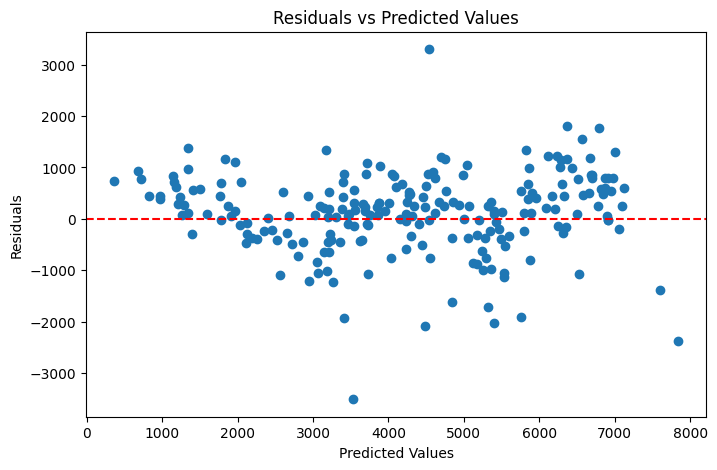

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

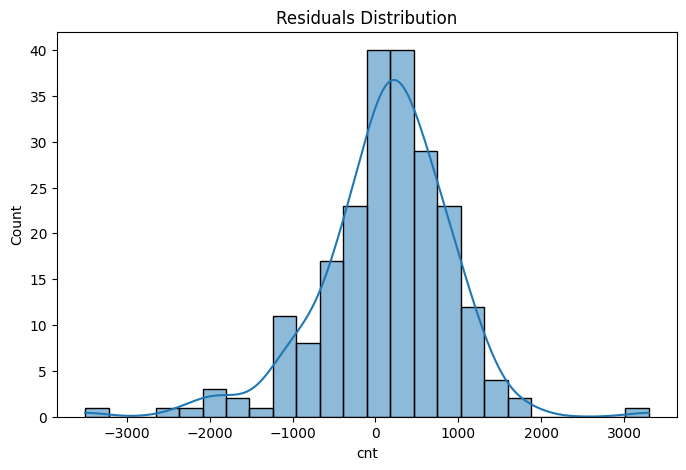

In [27]:
# Distribution plot of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()


In [28]:
from sklearn.metrics import r2_score

# Calculate R-squared score on test dataset
r2 = r2_score(y_test, y_pred)

print(f"R-squared score on test set: {r2:.4f}")

R-squared score on test set: 0.8291
